In [71]:
%matplotlib inline

# Linear Regression Example

This example uses the only one feature of the `diabetes` dataset (http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset), in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.



We start by loading the dataset.


In [72]:
print(__doc__)


# code source: Jaques Grobler
# Adapted by: Magdalini Eirinaki
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()




Automatically created module for IPython interactive environment


### Data Set Characteristics:
Number of Instances:
 	442
Number of Attributes:
 	First 10 columns are numeric predictive values
Target:	
Column 11 is a quantitative measure of disease progression one year after baseline

#### Attributes:	
Age:	
Sex:	
Body mass index:
Average blood pressure:
S1:	
S2:	
S3:	
S4:	
S5:	
S6:	

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

Before we do anything, we explore the dataset.

In [73]:
#print number of rows/columns
diabetes.data.shape

(442, 10)

In [74]:
#print first three rows of dataset
print(diabetes.data[0:3,])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]]


Why do we only see 10 attributes (and not the 11th)?

Check for the answer here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

*
*
*
*

For demonstration purposes, we select only the 3rd feature as input (X)

In [75]:
# Use only one feature as input variable X
diabetes_X = diabetes.data[:, np.newaxis, 2]

print(diabetes_X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

For demonstration purposes, we split the dataset into training and testing, including the last 20 instances in the test set and everything else in the training set. 

We perform the same for the target variable y.

In [76]:
###******** Update this part of your code **********###


# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20] #training set is all but the last 20 instances
diabetes_X_test = diabetes_X[-20:]  #test set is the last 20 instances

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]  #diabetes.target includes the class values Y
diabetes_y_test = diabetes.target[-20:]

We then build the linear regression model and plot the output.

Coefficients: 
 [ 938.23694429]
Mean squared error: 2547.99
Variance score: 0.47


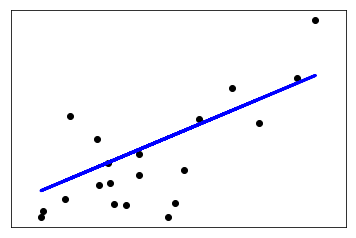

In [77]:
# Create linear regression object

###******** Update this part of your code **********###

regr = linear_model.LinearRegression() #run ordinary least squares

regr=linear_model.SGDRegressor(loss='squared_loss', alpha=0.00000001, n_iter=80000) #Gradient Descent 

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train) ##this is where "learning" happens!

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()